In [1]:
# Importing all the libararies that are used to Pre Process Data
import pandas as pd            # pd is alias
import numpy as np
import matplotlib.pyplot as plt
import math

# Importing all the Libraries Used in Machine Learning 
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
# Importing the Dataset and Reading the CSV File
print("Dataset:")
dataset = pd.read_csv('lung_cancer_examples(1).csv')
print(len(dataset))
print(dataset.head())

Dataset:
59
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


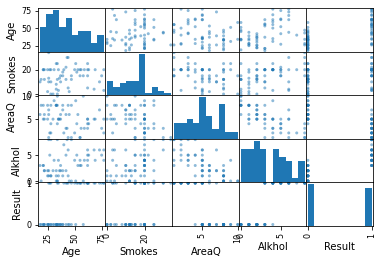

In [3]:
scatter_matrix(dataset) # Drawing the Relation-ships of the data
pyplot.show() # Showing the Dependancy of data on each other

In [4]:
# Splitting the Dataset into A and B
A = dataset[dataset.Result == 1]
B = dataset[dataset.Result == 0]

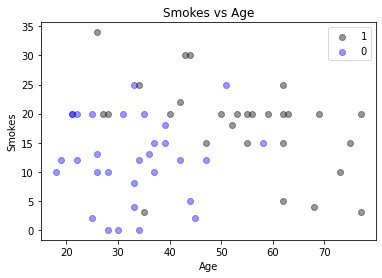

In [5]:
# Scatter of the Smokes vs Age with label 1 and 0
plt.scatter(A.Age, A.Smokes, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Smokes, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")
plt.show()

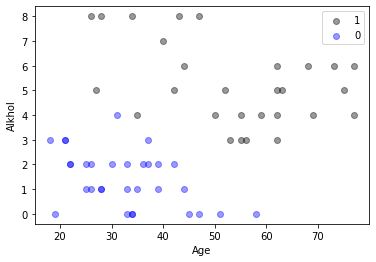

In [14]:
# Scatter of the Alkohol vs Age with label 1 and 0
plt.scatter(A.Age, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.show()

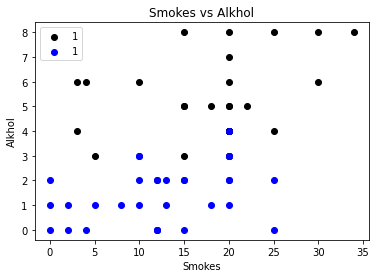

In [8]:
# Scatter of the Alkohol vs Age with label 1 and 1
plt.scatter(A.Smokes, A.Alkhol, color="Black", label="1")
plt.scatter(B.Smokes, B.Alkhol, color="Blue", label="1")
plt.xlabel("Smokes")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Smokes vs Alkhol")
plt.show()

In [9]:
# Split dataset into train and test 
x = dataset.iloc[:, 3:5]
y = dataset.iloc[:, 6]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [10]:
# Feature scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [11]:
print("---------Using KNN Algorithm-----------")

a = math.sqrt(len(y_train))
print(a)

# Defining a model - KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

# fit model
classifier.fit(x_train, y_train)

# Predict the test set result
y_pred = classifier.predict(x_test)
print(y_pred)

---------Using KNN Algorithm-----------
6.855654600401044
[0 0 1 1 0 0 0 0 1 1 0 0]


In [12]:
# Evaluate model
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("In Confusion Matrix:-----")
print("Position 1.1 shows the patients that don't have Cancer, In this case = 8")
print("Position 1.2 shows the number of  patients that have higher risk of Cancer, In this case = 1")
print("Position 2.1 shows the incorrect Value, In this case = 2")
print("Position 2.2 shows the correct number of patients that have Cancer, In this case = 2")

print('F1 Score: ', (f1_score(y_test, y_pred)) * 100)

print('ACCURACY of RF : ', (accuracy_score(y_test, y_pred)) * 100)

Confusion Matrix: 
[[7 1]
 [1 3]]
In Confusion Matrix:-----
Position 1.1 shows the patients that don't have Cancer, In this case = 8
Position 1.2 shows the number of  patients that have higher risk of Cancer, In this case = 1
Position 2.1 shows the incorrect Value, In this case = 2
Position 2.2 shows the correct number of patients that have Cancer, In this case = 2
F1 Score:  75.0
ACCURACY of RF :  83.33333333333334


In [13]:
# Using Decision tree
print("-----------Using Decision Tree Algorithm---------")
c = tree.DecisionTreeClassifier()
c.fit(x_train, y_train)
accu_train = np.sum(c.predict(x_train) == y_train) / float(y_train.size)
accu_test = np.sum(c.predict(x_test) == y_test) / float(y_test.size)
print("Classification accuracy on train", accu_train * 100)
print("Classification accuracy on test", accu_test * 100)

-----------Using Decision Tree Algorithm---------
Classification accuracy on train 95.74468085106383
Classification accuracy on test 75.0
